In [3]:
from my_recom import ReCom

In [25]:
from gerrychain import Graph, updaters, Election
from gerrychain.metrics import polsby_popper
from counties import *
from partisan_dislocation import *
from plotting import *

In [6]:
utah_graph = Graph.from_json('ChainUtilityData/graph_combined_vs_2018.json')

In [17]:
my_updaters = {"population": updaters.Tally('POP100', alias="population"),
                       "polsby_popper": polsby_popper,
                       "split_counties": SplitCounties(),
                       'SEN10': Election('SEN10', {"Dem": "SEN_DEM", "Rep": "SEN_REP"}),
                       'G10': Election('G10', {"Dem": "G_DEM", "Rep": "G_REP"}),
                       'COMB10': Election('COMB10', {"Dem":"COMB_DEM", "Rep":"COMB_REP"}),
                       'assignment_array': AssignmentArray()
                      }

In [18]:
partition0 = GeographicPartition(utah_graph, 'US_Distric', my_updaters)

In [22]:
ideal_pop = np.mean(list(partition0['population'].values()))

In [24]:
recom1 = ReCom('POP100', ideal_pop, 0.02)

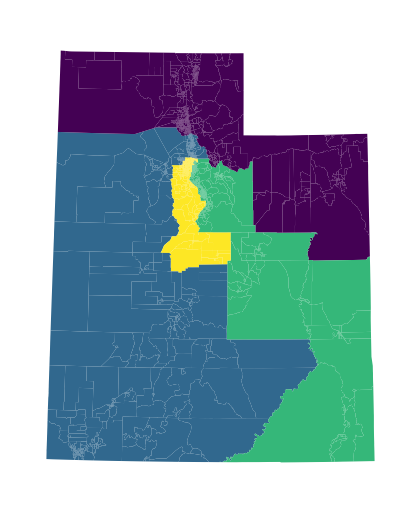

In [27]:
plot_district_map(partition0.assignment)

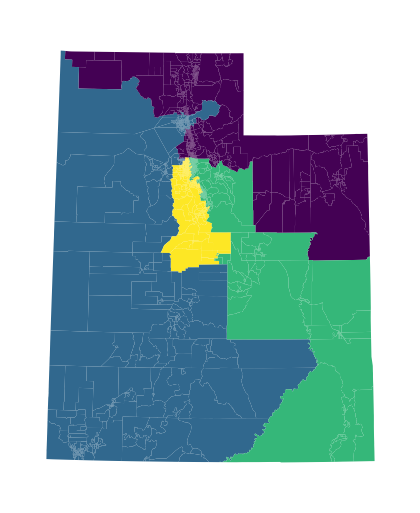

In [37]:
plot_district_map(recom1(recom1(partition0)).assignment)